**본격적인 시작에 앞서..**
##### 축구 지도자 자격증을 따러갔을 때였다. (물론 축구를 너무 못한 나머지 2번 다 떨어졌다) 축구 훈련 세션 구성에 대한 교육을 받았었는데 당시 내가 가장 인상 깊었던 것은  warm up의 구성이었다. 선수생활을 하진 않았으나 일반적으로 warm up은 그냥 운동장 몇 바퀴 돌고 스트레칭 하는 것으로만 생각했다. 왜냐면 난 일평생 그렇게 몸을 풀어왔으니 말이다. 그러나 정말 좋은 훈련을 위해서는 이 warm up에서 조차 당일 훈련 주제에 맞춰 구성해야 훈련이 처음부터 유기적으로 진행되고 선수들이 더 효율적으로 몸을 풀 수 있다는 것이었다. 만약에 오늘 진행할 훈련 주제가 '1vs1 돌파능력 향상'에 있다면 본격적인 훈련에 앞서 warm up에서도 각자 공과 함께 달린다던지 콘을 두고 달린다던지 한다는 것이다. 
##### 갑자기 축구 얘기를 쓰는 이유는 내가 지난 일주일 간 데이터 탐색을 그냥 막무가내로 한 것이 느껴졌기 때문이다. 물론 더 창의적인 인사이트를 위해 다양한 방법으로 데이터를 살펴보면 좋으나, 나는 지금 혼자서 모든 것을 진행해야되기 때문에 그럴 수 있는 물리적인 시간이 없다. 또 더 중요한 것은 결국 내가 어떤 한 가지 주제에 맞춰 본 데이터를 사용하여 통계적 분석을 진행할 것이기 때문에 그 분석 방법에 맞도록 데이터를 전처리해야 한다는 점이다. 따라서 축구에서 본격적인 훈련에 앞서 그날 훈련 주제를 떠올릴 수 있는 warm up을 했듯이 나의 EDA 및 전처리 역시 내 연구주제를 떠올릴 수 있어야 한다. 누군가가 내 전처리된 데이터와 EDA를 보고 어떤 주제를 잡고 어떤 분석을 하려는지 매우 쉽게 유추가 가능할정도로 말이다! 고로 연구목적과 주제를 다시 명확하게 정리해보고 분석을 시작하려고 한다.
---
**나는 이 연구를 왜 이 시점에 진행하는가?**
##### 소비자행동론 강의에서 시험 대신  Term-paper를 작성해서 12월 9일까지 제출해야하기 때문이다.  
---
**왜 그럼 Lpoint 데이터로 진행하는가?**
##### 물론 교수님께서는 실험계획법(Design of Experiments)을 공부할겸 분석 방법을 실험계획법의 분석방법론을 사용하라고 하셨다. 실험계획법은 계획->데이터 확보 -> 분석의 순서를 따르는 확증적 데이터 분석(Confirmatory Data Analysis) 중 하나이다. 그러나 나는 ⓐ 자기기입식 설문조사를 크게 신뢰하지 않고 ⓑ 타당성을 조금이라도 높이기 위해 실제 데이터를 사용하고 싶고 ⓒ EDA로 인사이트와 가설을 도출해내고 CDA로 검증할 수 있다고 판단하여 Lpoint 데이터셋을 활용하여 연구를 진행하고자 한다. 
---
**연구 주제는 어떤 것으로 할 것인가?**
##### 제목: 온라인 쇼핑몰 소비자의 행동특성에 대한 실증적 분석: 롯데멤버십 회원을 중심으로 (가제)
##### 구체적인 내용은 11월 22일까지 선행연구 찾아서 추가


In [1]:
#구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
filename='/content/drive/My Drive/DataSet/Lpoint/data/Product.csv'

In [5]:
#출력 한 번에 나올 수 있게 설정
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

### 1.Product 
#### 1.1 Product 내 변수만으로 알아볼 수 있는 것들 
1. 연속형 변수 3개(HITS_SEQ, PD_BUY_AM, PD_BUY_CT)의 각 각의 기술통계
2. PD_BUY_AM * PD_BUT_CT = 총구매가격 변수 추가하여 기술통계
3. 총구매가격과 HITS_SEQ의 상관관계(보통 가격이 높은 상품이 관여도가 높기 때문에 소비 이전에 정보검색량이 많다. 따라서 구매까지의 홈페이지 내 클릭 수를 보여주는 HITS_SEQ과 총구매 가격 간의 상관관계를 본다. H1:많이 살펴볼 수록 총구매가격이 높다.)

#### 1.2 Product와 타 데이터셋의 병합 및 전처리
1. Product*Master : PD_C 기준으로 병합이 가능함. 품목별 구매 가격과 양, Hit 수 등을 알 수 있음. 
2. Product*Custom : CLNT_ID 기준으로 병합이 가능함. 구매 이력에 더해 회원고객에 대한 인구통계를 알 수 있게 된다. 비회원 고객의 경우 NA값이 뜰 예정. 
3. Product*Session : CLNT_ID, SESS_ID 기준으로 병합이 가능함. 어떤 구매이력이 어느날, 
4. Product* Session* Search1 : ⓐ어떤 고객이 각 세션 내에서 어느날에 어떤 것을 검색하다가 구매했는지 알 수 있다. ⓑ어떤 고객이 어떤 것을 구매하기 위해 얼마나 많은 Hit, 페이지, 시간을 사용했는지 알 수 있다.






In [7]:
prd = pd.read_csv(filename, dtype={"CLNT_ID":np.str, "SESS_ID":np.str},thousands=",") #파일 불러오기
prd.head()
prd.dtypes
prd.shape
#행이 5024906, Product가 구매 이력 데이터이기 때문에 행의 수가 곧 6개월 간 구매빈도

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT
0,4139680,07605037,12,642112,색상:워터멜론,[바비브라운],39000,1
1,4140076,10189797,13,570603,색상:BLK0_(BLK0)BLACK|사이즈:120 / 2개,데상트,39000,2
2,4142395,06158159,85,179538,(not set),[아베다],39000,1
3,4144914,07935714,12,554336,색상:블랙|사이즈:160cm(12~13세) / 1개,아디다스 키즈,39000,1
4,4144917,06406509,78,190306,5개,데코르테,39000,5


CLNT_ID      object
SESS_ID      object
HITS_SEQ      int64
PD_C          int64
PD_ADD_NM    object
PD_BRA_NM    object
PD_BUY_AM     int64
PD_BUY_CT     int64
dtype: object

(5024906, 8)

In [ ]:
prd['TOT_PRICE'] = prd['PD_BUY_AM']*prd['PD_BUY_CT'] # 각 구매별 총 회원별 소비금액에 대한 변수 추가
prd.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,TOT_PRICE
0,4139680,07605037,12,642112,색상:워터멜론,[바비브라운],39000,1,39000
1,4140076,10189797,13,570603,색상:BLK0_(BLK0)BLACK|사이즈:120 / 2개,데상트,39000,2,78000
2,4142395,06158159,85,179538,(not set),[아베다],39000,1,39000
3,4144914,07935714,12,554336,색상:블랙|사이즈:160cm(12~13세) / 1개,아디다스 키즈,39000,1,39000
4,4144917,06406509,78,190306,5개,데코르테,39000,5,195000


##### 아래와 같이 CLNT_ID와 SESS_ID, HITS_SEQ가 각 각 같으면 같은 세션 내에서 동일 인물이 여러 제품을 한 번에 구매한 것임. 따라서 한 번의 구매에 여러가지 제품을 구매했다는 것을 알 수 있는 변수를 추가해야될 필요성이 있다. 




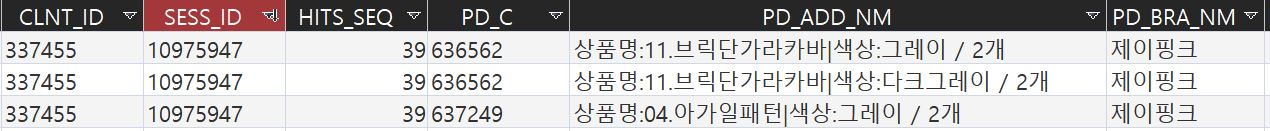

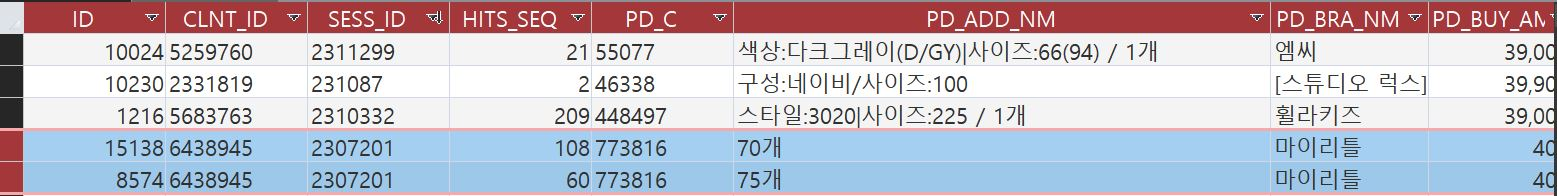

In [ ]:
hit_price_cor = prd[['HITS_SEQ', 'TOT_PRICE']] #또는 prd.loc[;,['HITS_SEQ', 'TOT_PRICE']]
hit_price_cor.head()

,HITS_SEQ,TOT_PRICE
0,12,39000
1,13,78000
2,85,39000
3,12,39000
4,78,195000


In [ ]:
hit_price_cor.corr(method='pearson') #왓더 -0.025

,HITS_SEQ,TOT_PRICE
HITS_SEQ,1.000000,-0.025467
TOT_PRICE,-0.025467,1.000000


In [ ]:
des = prd[['HITS_SEQ','PD_BUY_AM','PD_BUY_CT','TOT_PRICE']].describe()
pd.options.display.float_format = '{:.2f}'.format #소수점 두번째까지 표시
des

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PRICE
count,5024906.00,5024906.00,5024906.00,5024906.00
mean,81.26,51349.45,1.18,54089.34
std,85.94,117383.57,3.07,127671.25
min,1.00,10.00,1.00,10.00
25%,24.00,12900.00,1.00,14000.00
50%,50.00,28000.00,1.00,29000.00
75%,104.00,49900.00,1.00,53000.00
max,500.00,17779000.00,1440.00,39000000.00


In [ ]:
prd[prd['PD_BUY_AM']==17779000] # 1777만 9천원짜리 시계 FLEX
prd[prd['PD_BUY_CT']==1440] #prd['PD_BUY_CT'].idxmax() 몇 번째 행이 최대인지만 나옴.
prd.loc[prd['TOT_PRICE'].idxmax()] #정관장 10만원짜리를 390개를 샀음. 
prd.loc[prd['HITS_SEQ'].idxmax()] #900원짜리 구매하는데 클릭이 500번?

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,TOT_PRICE
3424550,0929827,00609951,57,51344,1개,프레드릭콘스탄트(시계),17779000,1,17779000


,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,TOT_PRICE
29649,3007548,03553431,112,643396,원단선택:91번|손잡이선택:좌측|설치공간:천정목재 / 1440개,리드센스,100,1440,144000


CLNT_ID       0820884
SESS_ID      05051994
HITS_SEQ           47
PD_C             1955
PD_ADD_NM        390개
PD_BRA_NM         정관장
PD_BUY_AM      100000
PD_BUY_CT         390
TOT_PRICE    39000000
Name: 2479620, dtype: object

CLNT_ID                 4598302
SESS_ID                01328757
HITS_SEQ                    500
PD_C                     460049
PD_ADD_NM    색상/사이즈:그린/100 / 1개
PD_BRA_NM                   포인포
PD_BUY_AM                   900
PD_BUY_CT                     1
TOT_PRICE                   900
Name: 6223, dtype: object

In [ ]:
from collections import Counter 
cnt_PBA = Counter(prd['PD_BUY_AM'])
cnt_PBA.most_common(10)
# 역시 가격은 9, 5가 많이 들어가는듯 
# 9 -> 10-1=9, 100-1=99와 같이 마지막 조금만 빼도 첫째 자리수가 달라지기 때문에 생각보다 할인을 많이한 기분
# 5 -> 인간의 손가락, 발가락 모두 한 쪽 당 5개 단위임. 셈을 할 때 5단위가 깔끔해보이는게 직관적(뇌피셜)
# 근데 비슷한 품목인데 9500원이 9400원보다 잘 팔리는지는 온라인이든 오프라인이든 실시간으로 심리실험해봐야함. 
# 본 데이터에서는 비슷한 품목 두 개 중 어느 것이 더 잘 팔렸는지를 알아보는 것은 어렵다. 외생변수(외부 정보탐색 가능성, 또 외부 정보탐색 후 접속 전 구매결정 여부 등) 통제 안됨. 또 실험집단의 구성에도 문제. 

[(9900, 98237),
 (39000, 94571),
 (10000, 89746),
 (29000, 85759),
 (15000, 82161),
 (19000, 76530),
 (30000, 67577),
 (49000, 61942),
 (35000, 58117),
 (19900, 53908)]

In [ ]:
cnt_PBC = Counter(prd['PD_BUY_CT'])
cnt_PBC.most_common(20)
# 구매 수량의 빈도를 기준으로 20위까지 나열했을 때 1~20개의 빈도가 대부분일 줄 알았는데 1~16까지 있고 17, 18, 19개가 순위에 들지 못했다. 
# 10위까지로 범위를 더 줄여보면 1~5개까지는 순서대로 가고 10개를 산 경우가 6, 7, 8개를 산 경우 보다 많다. 9개를 산 경우는 아예 10위권에 들지도 못함. 
# 5개 이상은 5 또는 10개 단위로 구매하는 것을 선호하는 경향이 손가락, 발가락 개수 때문이라는건 아직까지 내 뇌피셜이기 때문에 연구결과 한 번 찾아봐야함. 
# 또 가격, 품목의 영향을 받았을 가능성이 농후하다. 

[(1, 4676575),
 (2, 225930),
 (3, 58163),
 (4, 19915),
 (5, 19352),
 (10, 6953),
 (6, 5554),
 (7, 2237),
 (8, 1798),
 (20, 1626),
 (15, 950),
 (12, 805),
 (30, 676),
 (9, 576),
 (11, 386),
 (50, 268),
 (14, 247),
 (25, 220),
 (13, 219),
 (16, 213)]

,PD_BUY_AM,PD_BUY_CT
PD_BUY_AM,1.00,-0.02
PD_BUY_CT,-0.02,1.00


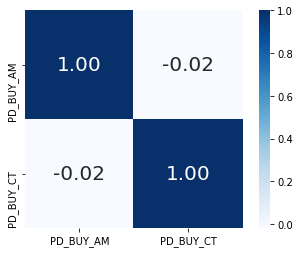

In [ ]:
#Product_각 상품 가격과 구매량 간의 상관관계 
prdcorr=prd[['PD_BUY_AM', "PD_BUY_CT"]].corr(method='pearson')
prdcorr

df_heatmap = sns.heatmap(prdcorr, cbar = True, annot = True, annot_kws={'size' : 20}, fmt = '.2f', square = True, cmap = 'Blues')
df_heatmap #굳이 그려봤음. 

#전체 상품과 구매량 간의 상관관계는 음의 방향으로 크지 않다. 가격이 높을수록 구매수량이 줄어들게 분명하고 1000원 미만의 상품들을 대량구매한 경우도 얼핏 보였기 때문에 음의 상관관계가 클 것으로 예상했으나, 전혀 아니었다. 


### 1.Product_2
#### 1.2 Product와 join할 수 있는 것들 
##### Access를 통해 쿼리를 쉽게 짜면서 꿀빨려고 했으나 이렇게 큰 데이터셋은 감당이 되지 않아 빨리 SQL을 조금이라도 배워서 하지 않는 이상 파이썬으로 해야할 듯. 

1. Product*Master : PD_C 기준으로 병합이 가능함. 품목별 구매 가격과 양, Hit 수 등을 알 수 있음. 
2. Product*Custom : CLNT_ID 기준으로 병합이 가능함. 구매 이력에 더해 고객에 대한 정보를 더 상세하게 할 수 있음. 
3. Product*Session : CLNT_ID, SESS_ID 
4. Product^Search1 : 


In [ ]:
mastercsv='/content/drive/My Drive/DataSet/Lpoint/data/Master.csv'
master = pd.read_csv(mastercsv)

##### 1. Product*Master
###### 대분류(CLAC1_NM)도 37개나 되기 때문에 줄일 필요가 있다.

In [ ]:
#11.9
#어떤 기준으로 대대분류를 추가하면 좋을지 찾아봐야함. 네이버 쇼핑도 좋은데 더 공식적인 것이면 좋을 것 같음. 
#

In [ ]:
# Product와 Master의 병합
prdmaster = pd.merge(prd,master[["PD_C", "CLAC1_NM"]],on=['PD_C'],how='left')
prdmaster.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,TOT_PRICE,CLAC1_NM
0,4139680,07605037,12,642112,색상:워터멜론,[바비브라운],39000,1,39000,화장품/뷰티케어
1,4140076,10189797,13,570603,색상:BLK0_(BLK0)BLACK|사이즈:120 / 2개,데상트,39000,2,78000,스포츠패션
2,4142395,06158159,85,179538,(not set),[아베다],39000,1,39000,퍼스널케어
3,4144914,07935714,12,554336,색상:블랙|사이즈:160cm(12~13세) / 1개,아디다스 키즈,39000,1,39000,유아동의류
4,4144917,06406509,78,190306,5개,데코르테,39000,5,195000,화장품/뷰티케어


In [ ]:
#행 변화 없음
prd.shape
prdmaster.shape

(5024906, 9)

(5024906, 10)

In [ ]:
#대분류에 따른 구매이력
prdmaster['CLAC1_NM'] = prdmaster['CLAC1_NM'].astype('category')
clntbyclac1 = pd.DataFrame(prdmaster[['CLAC1_NM','CLNT_ID']].groupby(['CLAC1_NM']).count())
clntbyclac1['CLNT_ID'].sum() #본 데이터셋에서 총 구매 빈도(이력)은 502만 4906번 
clntbyclac1['PER'] =(clntbyclac1['CLNT_ID']/5024906)*100
clntbyclac1.sort_values(by='PER', ascending=False)


5024906

,CLNT_ID,PER
CLAC1_NM,,
여성의류,677199,13.48
화장품/뷰티케어,574033,11.42
스포츠패션,564355,11.23
남성의류,554910,11.04
패션잡화,449032,8.94
속옷/양말/홈웨어,417473,8.31
유아동의류,341572,6.80
시즌스포츠,150424,2.99
출산/육아용품,141512,2.82


In [ ]:
#위에서 CLNT_ID와 CLAC1이 groupby했는데 구매이력이라고 한 이유는? 
#Product 데이터셋은 기본적으로 구매이력을 나타낸 것이다. 따라서 CLNT_ID에도 중복된 값이 많다. -> 그래서 무작정 기본키로 활용할 수 없음. 
#
len(prdmaster['CLNT_ID'].unique()) #회원수

922737

In [ ]:
clntbyclac1.sort_values(by='PER', ascending=False)
#여성 의류와 화장품/뷰티케어가 TOP2. 
#그러나 여러 번 구매한 것이 많은 매출을 차지하는 것은 아니다. 

,CLNT_ID,PER
CLAC1_NM,,
여성의류,677199,13.48
화장품/뷰티케어,574033,11.42
스포츠패션,564355,11.23
남성의류,554910,11.04
패션잡화,449032,8.94
속옷/양말/홈웨어,417473,8.31
유아동의류,341572,6.80
시즌스포츠,150424,2.99
출산/육아용품,141512,2.82


In [ ]:
#대분류별 매출액
totpricebyclac1 = pd.DataFrame(prdmaster[['CLAC1_NM','TOT_PRICE']].groupby(['CLAC1_NM']).sum())
totpricebyclac1['PER'] =(totpricebyclac1['TOT_PRICE']/(prd['TOT_PRICE'].sum()))*100
totpricebyclac1.sort_values(by='PER', ascending=False).head(10) #대분류별 매출액과 전체 매출액 비율 Top10
clntbyclac1.sort_values(by='PER', ascending=False).head(10) #대분류별 주문 빈도와 비율 Top10

,TOT_PRICE,PER
CLAC1_NM,,
패션잡화,44870368961,16.51
여성의류,34140463488,12.56
스포츠패션,30148248820,11.09
화장품/뷰티케어,30086830526,11.07
남성의류,18457045085,6.79
가구,12399026355,4.56
건강식품,10762419216,3.96
유아동의류,9951995610,3.66
생활/주방가전,9946383503,3.66


,CLNT_ID,PER
CLAC1_NM,,
여성의류,677199,13.48
화장품/뷰티케어,574033,11.42
스포츠패션,564355,11.23
남성의류,554910,11.04
패션잡화,449032,8.94
속옷/양말/홈웨어,417473,8.31
유아동의류,341572,6.80
시즌스포츠,150424,2.99
출산/육아용품,141512,2.82


In [ ]:
#Product_각 상품 가격과 구매량 간의 상관관계 
is_fmc = prdmaster[prdmaster['CLAC1_NM'].isin(['여성의류'])]
is_fmc.head()
is_fmccorr=is_fmc[['PD_BUY_AM', 'PD_BUY_CT']].corr(method='pearson')
is_fmccorr #아니 여성의류는 오히려 더 적네

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,TOT_PRICE,CLAC1_NM
12,4154576,04253415,19,591229,size:S|color:오프 화이트 / 1개,망고(MANGO),39000,1,39000,여성의류
17,4167192,10832157,189,479110,색상:화이트(WH)|사이즈:F / 1개,숲,39000,1,39000,여성의류
19,4170352,04651820,387,166295,색상:(69)오렌지|사이즈:55 / 1개,제이제이 지고트,39000,1,39000,여성의류
25,4180381,10005643,169,571504,색상:민트|사이즈:66 / 1개,라인,39000,1,39000,여성의류
29,4185920,06636436,46,581220,색상:블루|사이즈:55 / 1개,리스트,39000,1,39000,여성의류


,PD_BUY_AM,PD_BUY_CT
PD_BUY_AM,1.00,-0.01
PD_BUY_CT,-0.01,1.00


In [ ]:
is_cosm = prdmaster[prdmaster['CLAC1_NM'].isin(['화장품/뷰티케어'])]
is_cosmcorr=is_cosm[['PD_BUY_AM', 'PD_BUY_CT']].corr(method='pearson')
is_cosmcorr #화장품/뷰티의 가격과 판매개수 상관계수 -0.05

,PD_BUY_AM,PD_BUY_CT
PD_BUY_AM,1.00,-0.05
PD_BUY_CT,-0.05,1.00


In [ ]:
is_some = prdmaster[prdmaster['CLAC1_NM'].isin(['패션잡화'])]
is_somecorr=is_some[['PD_BUY_AM', 'PD_BUY_CT']].corr(method='pearson')
is_somecorr #패션잡화의 가격과 판매개수 상관계수 -0.03

,PD_BUY_AM,PD_BUY_CT
PD_BUY_AM,1.00,-0.03
PD_BUY_CT,-0.03,1.00


In [ ]:
customcsv='/content/drive/My Drive/DataSet/Lpoint/data/Custom.csv'
custom = pd.read_csv(customcsv, dtype={"CLNT_ID": np.str})

In [ ]:
srchcsv='/content/drive/My Drive/DataSet/Lpoint/data/Search1.csv'
search1 = pd.read_csv(srchcsv, dtype={"CLNT_ID":np.str, "SESS_ID":np.str})

srch2csv='/content/drive/My Drive/DataSet/Lpoint/data/Search2.csv'
search2 = pd.read_csv(srch2csv)

In [ ]:
sessioncsv='/content/drive/My Drive/DataSet/Lpoint/data/Session.csv'
session = pd.read_csv(sessioncsv, dtype={"CLNT_ID": np.str, "SESS_ID":np.str}, thousands=",")

In [ ]:
prdmastercustom = pd.merge(prdmaster,custom,on=['CLNT_ID'],how='left')
prdmastercustom.head()
prdmastercustom.isna().sum()
#Product에는 있는데 Custom에는 없음. 두 데이터셋을 CLNT_ID를 기준으로 병합할 경우 누락되는 회원정보가 103만 6319건 
# 그 103만 6319건은 비회원 구매이력임

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,TOT_PRICE,CLAC1_NM,CLNT_GENDER,CLNT_AGE
0,4139680,07605037,12,642112,색상:워터멜론,[바비브라운],39000,1,39000,화장품/뷰티케어,NaN,nan
1,4140076,10189797,13,570603,색상:BLK0_(BLK0)BLACK|사이즈:120 / 2개,데상트,39000,2,78000,스포츠패션,F,40.00
2,4142395,06158159,85,179538,(not set),[아베다],39000,1,39000,퍼스널케어,NaN,nan
3,4144914,07935714,12,554336,색상:블랙|사이즈:160cm(12~13세) / 1개,아디다스 키즈,39000,1,39000,유아동의류,M,40.00
4,4144917,06406509,78,190306,5개,데코르테,39000,5,195000,화장품/뷰티케어,NaN,nan


CLNT_ID              0
SESS_ID              0
HITS_SEQ             0
PD_C                 0
PD_ADD_NM            0
PD_BRA_NM            0
PD_BUY_AM            0
PD_BUY_CT            0
TOT_PRICE            0
CLAC1_NM             0
CLNT_GENDER    1036319
CLNT_AGE       1036319
dtype: int64

#11.10 11:00 
지금의 코딩들의 목적은 소비자행돈론의 Term-Paper에 있다. 본 데이터셋에 소비행동 관련 데이터가 많기 때문에 이를 활용해서 교수님께서 요구하신 '실험설계'의 방법론에 적용하고자 하는 것이다. 그러나 실험설계의 방법론들은 데이터를 얻기 위해, 그러니깐 미래에 시행할 실험에 대한 설계를 하는 것인 반면에 이 데이터셋은 이미 로그가 발생한 것으로 파생변수를 내가 만들지 않는 이상 데이터 측정에 있어서 내가 통제할 수 있는 것이 없다. 
또 요즘 이루어지는 보통 빅데이터의 탐색적인 연구와 달리 연구목적을 먼저 정해야 실험설계방법론이 적용 가능한지 판단이 설텐데 뚜렷한 연구목적 역시 아직 존재하지 않는다. 따라서 아래 두 가지 질문에 대해 먼저 답할 수 있어야 데이터셋 탐색이 유의미해질 것이다. 
 

*   6개의 데이터셋 중에 실험자가 연구를 위해 조작했다고 볼 수 있는 변수가 무엇인가? 그러니깐 자동 로그 기록이긴 하나 "사실 실험자가 연구를 위해 조작한 것이랍니다"라는 개구라 같은 가정을 둘 수 있는 변수

*   그것이 있다면 비슷한 선행연구가 있는가? 


In [ ]:
#걍 신기해서 갖다 놓음. 
#def count(n, m):
#    cnt    = 0
#   num    = n
#  ln     = len(str(n))
#    offset = 10 ** ln
#   
#   while num <= m:
#       cnt += 1
#       num += offset
#
#   return cnt

#    count(5, 14)

In [ ]:
#PD_BUY_AM은 상품의 가격 변수로 매출에 직결되기 때문에 사용할 수 밖에 없는데, 가격은 판매자 입장에서 소비자에게 설득력을 높이기 위해 조작한 경우가 많다. 
#또는 품목에 따른 아주 고정적인 원가에 따라 형성 되는 판매가격대가 있을 수 밖에 없다. 이런 점들이 최종 판매가격에 편의를 발생할 수 있는 것인데, 보정 없이 사용하는게 옳은 것인가 의문이 든다.
#따라서 일단 한 번 PD_BUY_AM에서 서로 다른 상품가격들 중 9000, 900, 90원으로 끝나는 가격의 비율이 얼마나 되는지 확인해보려고 한다. 

cnt_PBA.most_common(10)

[(9900, 98237),
 (39000, 94571),
 (10000, 89746),
 (29000, 85759),
 (15000, 82161),
 (19000, 76530),
 (30000, 67577),
 (49000, 61942),
 (35000, 58117),
 (19900, 53908)]

In [ ]:
len(prd['PD_BUY_AM'].unique()) #서로 다른 가격 1만 7731개

17731

In [ ]:
sum(prd['PD_BUY_AM']%1000==900) #전체 구매이력에서 900원으로 끝나는 가격의 개수

876482

In [ ]:
sum(prd['PD_BUY_AM'].unique()%1000==900) #서로 다른 가격에서 900원으로 끝나는 가격의 개수. 17731개의 서로 다른 가격 중 63개가 900원으로 끝남

633

In [ ]:
round(sum(prd['PD_BUY_AM'].unique()%1000==900)/len(prd['PD_BUY_AM'].unique())*100, 2) #서로 다른 가격에서 900원으로 끝나는 가격의 상품 개수 비율 
round(sum(prd['PD_BUY_AM'].unique()%10000==9000)/len(prd['PD_BUY_AM'].unique())*100, 2)
round(sum(prd['PD_BUY_AM'].unique()%100==90)/len(prd['PD_BUY_AM'].unique())*100, 2)
round(sum(prd['PD_BUY_AM'].unique()%1000==500)/len(prd['PD_BUY_AM'].unique())*100, 2)
round(sum(prd['PD_BUY_AM'].unique()%10000==5000)/len(prd['PD_BUY_AM'].unique())*100, 2)
round(sum(prd['PD_BUY_AM'].unique()%1000==0)/len(prd['PD_BUY_AM'].unique())*100, 2)
round(sum(prd['PD_BUY_AM'].unique()%10000==0)/len(prd['PD_BUY_AM'].unique())*100, 2)

#이렇게 코드 짜서 언제 다 분석하겠니 응?
#객체지정, for문 익혀서 더 효율적으로 코드 짤 수 있는 방법 도모 

3.57

1.4

5.7

3.49

1.33

12.58

2.02

In [ ]:
round(sum(prd['PD_BUY_AM']%1000==900)/len(prd['PD_BUY_AM'])*100, 2) #서로 다른 가격에서 900원으로 끝나는 가격의 상품 개수 비율 

#서로 다른 가격들 중에서 900원으로 끝나는 가격은 3.57%인 반면 전체 구매 이력에서는 17.44%, 900원대로 가격을 설정하면 잘 팔린다는 것이 아니라 900원으로 끝나는 어떤 상품들이 잘 팔린다는 것을 의미. 정확한 매개변수 찾아야함. 

17.44

### 11.12 
#### 고객 한 명에 대한 HIT 데이터가 모두 주어지지 않았다. 예를 들어 CLNT_ID 000123이 있다면 구매 이전까지의 Hit가 무엇인지 알 수 없다. 주어진 Product의 HITS_SEQ는 구매까지의 Hit 수를 알려줄 뿐이다. 구매 이후에도 Hit가 있었는지 알수 없다. 물론 CLNT_ID와 SESS_ID와 SESS_DT grouby 해서 같은 날 같은 고객이 얼마나 세션을 할당 받았고 구매가 얼마나 이루어졌는지를 확인해볼 수는 있으나 구매 이후에도 같은 날 세션을 다시 할당 받아서 또 구매하는 경우가 많진 않을 것 같다. 

#### 위 첫 번째 사진은 CLNT_ID와 SESS_ID와 HITS_SEQ에서 각 각 같은 값을 갖는 행의 한 예시이다. 한 고객이 같은 날 할당 받은 한 세션에서 한 번의 클릭으로 제이핑크 브랜드의 의류 3개 제품을 산 것이다. 즉, 장바구니를 통해 구매한 것이다(같은 HITS_SEQ는 장바구니라는 것은 설명회 자료에도 기재되어 있다). 

#### 두 번째 사진은 CLNT_ID와 SESS_ID는 같은데 HITS_SEQ는 다른 경우이다. 마이리틀의 제품을 60번째 히트에서 구매했다. 이후 47번의 클릭을 더 하고 48번째 클릭(전체 108)에서 같은 제품 70개를 구매했다. 근데 이것이 단순 추가 구매하여 총 145개를 구매하게 된 것인지 첫 번째 구매에서 두 번째 구매 사이의 47번의 클릭에서 수량 조절을 위한 구매 취소가 이루어졌었는지 알 수가 없다. 이러한 문제점을 안고 있기 때문에 이 데이터들을 활용하여 통계치를 내면 편향이 발생할 것이고 그럼 결과적으로 오류를 범하게 될 것이다. 따라서 위 두 번째 사진의 데이터와 같은 케이스는 모두 제외하고 분석을 진행하는 것이 맞는지, 아니면 소위 '빅데이터'이기 때문에 이러한 작은 편향들은 무시하고 가도 무방한지에 대해 고민하게 된다. 

In [ ]:
#Product * Session 
session['SESS_DT'] = pd.to_datetime(session['SESS_DT'], format="%Y%m%d")
session.isna().sum()

CLNT_ID                0
SESS_ID                0
SESS_SEQ               0
SESS_DT                0
TOT_PAG_VIEW_CT      274
TOT_SESS_HR_V      14202
DVC_CTG_NM             0
ZON_NM                 0
CITY_NM                0
dtype: int64

In [ ]:
prdmaster = pd.merge(prdmastercustom, session, how='inner', on=['CLNT_ID', 'SESS_ID'])
prdmaster.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,TOT_PRICE,CLAC1_NM,CLNT_GENDER,CLNT_AGE,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM
0,4139680,07605037,12,642112,색상:워터멜론,[바비브라운],39000,1,39000,화장품/뷰티케어,NaN,nan,1,2018-05-26,21.00,902.00,desktop,Seoul,Seoul
1,4139680,07605037,12,401577,색상:몰리 와우,[바비브라운],39000,1,39000,화장품/뷰티케어,NaN,nan,1,2018-05-26,21.00,902.00,desktop,Seoul,Seoul
2,4139680,07605037,28,401577,색상:몰리 와우,[바비브라운],39000,1,39000,화장품/뷰티케어,NaN,nan,1,2018-05-26,21.00,902.00,desktop,Seoul,Seoul
3,4139680,07605037,28,642112,색상:카바나,[바비브라운],39000,1,39000,화장품/뷰티케어,NaN,nan,1,2018-05-26,21.00,902.00,desktop,Seoul,Seoul
4,4139680,07605037,12,642112,색상:카바나,[바비브라운],39000,1,39000,화장품/뷰티케어,NaN,nan,1,2018-05-26,21.00,902.00,desktop,Seoul,Seoul


In [ ]:
#결측치 제거, axis=1로하면 열이 제거됨
prdmaster = prdmaster.dropna(axis=0) 
prdmaster.isna().sum() #결측치 없는 것으로 나옴
prdmaster.shape

CLNT_ID            0
SESS_ID            0
HITS_SEQ           0
PD_C               0
PD_ADD_NM          0
PD_BRA_NM          0
PD_BUY_AM          0
PD_BUY_CT          0
TOT_PRICE          0
CLAC1_NM           0
CLNT_GENDER        0
CLNT_AGE           0
SESS_SEQ           0
SESS_DT            0
TOT_PAG_VIEW_CT    0
TOT_SESS_HR_V      0
DVC_CTG_NM         0
ZON_NM             0
CITY_NM            0
dtype: int64

(3971933, 19)

In [ ]:
is_hit1 = prdmaster['HITS_SEQ']>1
is_sq = prdmaster['TOT_PAG_VIEW_CT']<2
is1 = prdmaster[is_hit1&is_sq]
is1

#첫 세션(Sess_seq=1)에서 첫 클릭(Hits_seq=1)에 바로 구매를 할 수 없음. 데이터 측정의 오류로 판단. 


,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,TOT_PRICE,CLAC1_NM,CLNT_GENDER,CLNT_AGE,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM
8390,4227380,08344411,2,323559,색상:멜란지 블루|사이즈:100 / 1개,지오투,39000,1,39000,남성의류,F,30.00,360,2018-05-14,1.00,4.00,mobile,Gyeongsangbuk-do,Pohang-si
8391,4227380,08344411,2,323567,색상:멜란지 네이비|사이즈:100 / 1개,지오투,39000,1,39000,남성의류,F,30.00,360,2018-05-14,1.00,4.00,mobile,Gyeongsangbuk-do,Pohang-si
8392,4227380,08344411,2,383119,색상:블루|사이즈:100 / 1개,스파소,39000,1,39000,남성의류,F,30.00,360,2018-05-14,1.00,4.00,mobile,Gyeongsangbuk-do,Pohang-si
63017,3868211,05594766,2,630711,브라:75A|팬티:90 / 1개,엘르이너웨어,39200,1,39200,속옷/양말/홈웨어,M,10.00,4,2018-06-28,1.00,17.00,mobile,Gwangju,Gwangju
63018,3868211,05594766,2,470361,사이즈:90|모델명:4.TWH0467CRM / 1개,트라이엄프,7000,1,7000,속옷/양말/홈웨어,M,10.00,4,2018-06-28,1.00,17.00,mobile,Gwangju,Gwangju
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4990594,6242296,02611591,2,392328,1개,리복,38000,1,38000,화장품/뷰티케어,M,30.00,6,2018-08-17,1.00,2.00,mobile,Seoul,Seoul
4993515,4039481,07007052,2,452322,색상:블랙|사이즈:J5 38 / 1개,제이스타일,38900,1,38900,여성의류,F,30.00,903,2018-06-05,1.00,2.00,mobile,Seoul,Seoul
4998544,0248421,04757220,2,128865,색상:블랙(BK)|사이즈:90(XL) / 1개,뉴발란스,39000,1,39000,스포츠패션,F,30.00,558,2018-07-12,1.00,3.00,mobile,Gyeongsangbuk-do,Yecheon-gun
5002762,2017720,02586656,3,72547,색상:블루|사이즈:105 / 1개,카운테스마라(셔츠),39000,1,39000,남성의류,M,50.00,6,2018-08-18,1.00,7.00,mobile,Gyeonggi-do,Gimpo-si


In [ ]:
#일별 클라이언트 아이디 개수
clntperday = prdmaster[['SESS_DT','CLNT_ID']].groupby(['SESS_DT']).count()
clntperday.head(15)

,CLNT_ID
SESS_DT,
2018-04-01,32086
2018-04-02,29009
2018-04-03,28178
2018-04-04,25699
2018-04-05,24063
2018-04-06,20150
2018-04-07,18432
2018-04-08,24589
2018-04-09,26964


In [ ]:
round(clntperday['CLNT_ID'].mean()) #일 평균 구매 회원 수

21705

In [ ]:
#prdmaster[['TOT_PRICE', 'TOT_PAG_VIEW_CT']].groupby(['TOT_PAG_VIEW_CT']).count() #이렇게 하면 토탈 페이지뷰가 1인 구매이력의 빈도가 나옴
prdmaster[['TOT_PRICE', 'TOT_PAG_VIEW_CT']].groupby(['TOT_PAG_VIEW_CT']).count()

,TOT_PRICE
TOT_PAG_VIEW_CT,
1.00,458
2.00,4999
3.00,3973
4.00,3346
5.00,4367
...,...
495.00,2461
496.00,3967
497.00,6011


,TOT_PRICE,TOT_PAG_VIEW_CT,HITS_SEQ,TOT_SESS_HR_V,SESS_SEQ
TOT_PRICE,1.00,-0.00,-0.03,0.01,-0.04
TOT_PAG_VIEW_CT,-0.00,1.00,0.86,0.71,0.13
HITS_SEQ,-0.03,0.86,1.00,0.61,0.06
TOT_SESS_HR_V,0.01,0.71,0.61,1.00,0.09
SESS_SEQ,-0.04,0.13,0.06,0.09,1.00


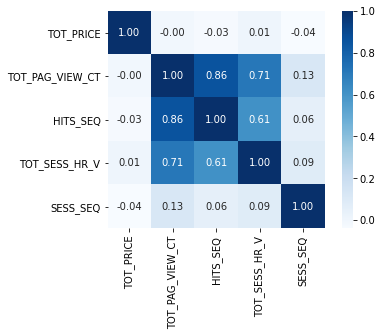

In [ ]:
prpvcorr=prdmaster[['TOT_PRICE', 'TOT_PAG_VIEW_CT','HITS_SEQ', 'TOT_SESS_HR_V', 'SESS_SEQ']].corr(method='pearson')
prpvcorr

df_heatmap = sns.heatmap(prpvcorr, cbar = True, annot = True, annot_kws={'size' : 10}, fmt = '.2f', square = True, cmap = 'Blues')
df_heatmap #굳이 그려봤음. 

#왓더 페이지 뷰와 고객 당 구매 가격은 상관관계 걍 없다. 
#각 구매 당 총 구매가격인 TOT_PRICE는 정보탐색과 직접적으로 관련된 변수와 그 어떤 상관관계도 없다. 아오씨
#HIT가 1~3정도인 너무 작은 것들, 

In [ ]:
is_1 = prdmaster['TOT_PAG_VIEW_CT']==1
is1 = prdmaster[is_1]
is1

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,TOT_PRICE,CLAC1_NM,CLNT_GENDER,CLNT_AGE,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM
8390,4227380,08344411,2,323559,색상:멜란지 블루|사이즈:100 / 1개,지오투,39000,1,39000,남성의류,F,30.00,360,2018-05-14,1.00,4.00,mobile,Gyeongsangbuk-do,Pohang-si
8391,4227380,08344411,2,323567,색상:멜란지 네이비|사이즈:100 / 1개,지오투,39000,1,39000,남성의류,F,30.00,360,2018-05-14,1.00,4.00,mobile,Gyeongsangbuk-do,Pohang-si
8392,4227380,08344411,2,383119,색상:블루|사이즈:100 / 1개,스파소,39000,1,39000,남성의류,F,30.00,360,2018-05-14,1.00,4.00,mobile,Gyeongsangbuk-do,Pohang-si
63017,3868211,05594766,2,630711,브라:75A|팬티:90 / 1개,엘르이너웨어,39200,1,39200,속옷/양말/홈웨어,M,10.00,4,2018-06-28,1.00,17.00,mobile,Gwangju,Gwangju
63018,3868211,05594766,2,470361,사이즈:90|모델명:4.TWH0467CRM / 1개,트라이엄프,7000,1,7000,속옷/양말/홈웨어,M,10.00,4,2018-06-28,1.00,17.00,mobile,Gwangju,Gwangju
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993515,4039481,07007052,2,452322,색상:블랙|사이즈:J5 38 / 1개,제이스타일,38900,1,38900,여성의류,F,30.00,903,2018-06-05,1.00,2.00,mobile,Seoul,Seoul
4993917,5379746,06492725,1,6584,옵션:943827-300(140/8C) / 1개,나이키(슈즈),38500,1,38500,스포츠패션,F,40.00,1450,2018-06-13,1.00,1.00,mobile,Seoul,Seoul
4998544,0248421,04757220,2,128865,색상:블랙(BK)|사이즈:90(XL) / 1개,뉴발란스,39000,1,39000,스포츠패션,F,30.00,558,2018-07-12,1.00,3.00,mobile,Gyeongsangbuk-do,Yecheon-gun
5002762,2017720,02586656,3,72547,색상:블루|사이즈:105 / 1개,카운테스마라(셔츠),39000,1,39000,남성의류,M,50.00,6,2018-08-18,1.00,7.00,mobile,Gyeonggi-do,Gimpo-si


In [ ]:
round(is1['TOT_PRICE'].mean())

62327.0

#### 11.17 
##### TOT_PRICE와 Session 관련 정보탐색 변수 간 상관관계가 전혀 안보임. 우선 ⓐ각 변수 이상치 제거 ⓑ 또는 TOT_PRICE 이상치에 해당하는 행을 한 번 눈으로 직접 볼 것 ⓒ Hit가 1이상인데 Sess_HR가 0이라던지 이상한 행들 제거 ⓓ Session에서 애초에 비워져있던 행 제거 
### 걍 전처리부터 존나 똑바로 하자. 